In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
from tensorflow import keras

In [5]:
from tensorflow.keras import layers

In [7]:
generator = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(101,)),
    layers.Dense(28 * 28, activation='sigmoid'),
    layers.Reshape((28, 28))
])

In [9]:
discriminator = keras.Sequential([
    keras.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [10]:
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [11]:
noise_input = layers.Input(shape=(100,))
label_input = layers.Input(shape=(1,))
merged_input = layers.Concatenate()([noise_input, label_input])
generated_image = generator(merged_input)
gan_output = discriminator(generated_image)

gan = keras.Model([noise_input, label_input], gan_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')

In [12]:
gan = keras.Model([noise_input, label_input], gan_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


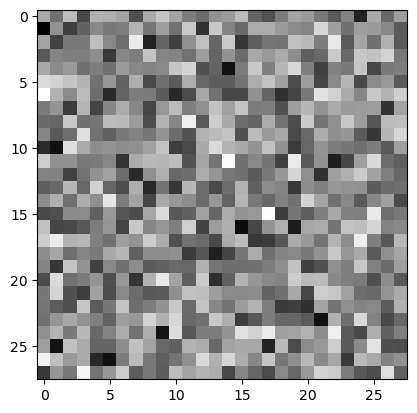

In [15]:
noise = np.random.randn(1, 100)
label = np.array([[1]]) 
img = generator.predict(np.concatenate([noise, label], axis=1))

plt.imshow(img[0], cmap='gray')
plt.show()